<a href="https://colab.research.google.com/github/mowne67/Portfolio-Mowne/blob/main/Handwritten_Digit_Recognition_with_Tensorflow_2_0_%26_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Handwritten Digit Recognition with Tensorflow 2.0 (Keras)

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

##Loading the dataset

We download and use the MNIST dataset for Handwritten Digits. The greyscale values of the pixels are changed to float.

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

class_names=['0','1','2','3','4','5','6','7','8','9']

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

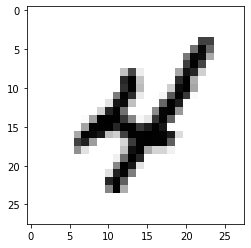

In [4]:
IMG_INDEX = 9 

plt.imshow(train_images[IMG_INDEX] ,cmap=plt.cm.binary)
plt.show()

##Neural Network Architecture

A common architecture for a CNN is a stack of Conv2D and MaxPooling2D layers followed by a few denesly connected layers.
A convolutional base is built at the start as shownn below.
The MaxPooling2D layer will perform the max pooling operation using 2x2 samples and a stride of 2.

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(56, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(56, (3, 3), activation='relu'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 56)        14168     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 56)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 56)          28280     
Total params: 42,728
Trainable params: 42,728
Non-trainable params: 0
_________________________________________________________________


The CNN is flattened and fed to the dense layers and the output layer shape is set to 10 as we need our output within the ten classes of digits. 

In [7]:
model.add(layers.Flatten())
model.add(layers.Dense(56, activation='relu'))
model.add(layers.Dense(10))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 56)        14168     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 56)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 56)          28280     
_________________________________________________________________
flatten (Flatten)            (None, 504)               0         
_________________________________________________________________
dense (Dense)                (None, 56)                2

The images are reshaped from (x,x) to (x,x,1) to make them 3D.

In [9]:
train_images1=train_images.reshape(60000,28,28,1)
test_images1=test_images.reshape(10000,28,28,1)

In [10]:
train_images1.shape

(60000, 28, 28, 1)

##Training and Testing

Adam Optimizer is used with Sparse Categorical Entropy as the loss and accuracy as the metric. Then the model is trained and tested with the respective images and labels.

Lower value of epochs are used to make the training faster. For better accuracy, a higher number can be used.

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images1, train_labels, epochs=4, 
                    validation_data=(test_images1, test_labels))

Epoch 1/4
1875/1875 [==============================] - 47s 25ms/step - loss: 0.1651 - accuracy: 0.9495 - val_loss: 0.0537 - val_accuracy: 0.9838
Epoch 2/4
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0493 - accuracy: 0.9848 - val_loss: 0.0338 - val_accuracy: 0.9884
Epoch 3/4
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0351 - accuracy: 0.9889 - val_loss: 0.0330 - val_accuracy: 0.9897
Epoch 4/4
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0280 - accuracy: 0.9914 - val_loss: 0.0470 - val_accuracy: 0.9855


In [12]:
test_loss, test_acc = model.evaluate(test_images1,  test_labels, verbose=2)
print(test_acc)

313/313 - 2s - loss: 0.0470 - accuracy: 0.9855
0.9854999780654907


We got an accuracy of 98% which is really good considering the accuracy we got without using keras in [my previous project](https://github.com/mowne67/Portfolio-Mowne/blob/main/Digit_Recognition_from_Handwritten_Text_with_Tensorflow_1_x.ipynb)

In [13]:
predictions=model.predict(test_images1)

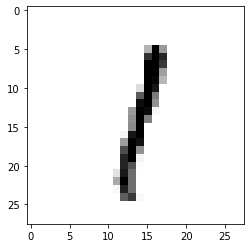

array([-5.3157434 ,  9.035201  , -0.973773  , -2.1544485 ,  0.5547784 ,
       -0.77466035, -1.6821938 ,  0.14273965,  0.66031253, -0.7056283 ],
      dtype=float32)

In [14]:
plt.imshow(test_images[57] ,cmap=plt.cm.binary)
plt.show()
predictions[57]

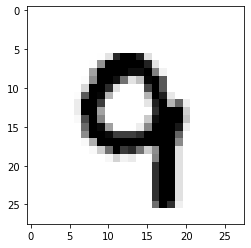


THE PREDICTED DIGIT  -->    9 


In [15]:
n=678       #Enter a random value between (0-9999) to see the image and the predicted digit
plt.imshow(test_images[n] ,cmap=plt.cm.binary)
plt.show()
digit=list(predictions[n]).index(max(predictions[n]))
print(end="\n")
print("THE PREDICTED DIGIT  -->    {} ".format(digit))